In [57]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [58]:
def load_imagen(img_name):
    path1 = 'G:/.shortcut-targets-by-id/1Ow6KjVPo1myLESTKlM8Q0m1s8bsDHkGo/TratamientoDigitalImagenes_2022_2/Imagenes/' + img_name
    path2 = 'C:/Users/claudio.pacheco/Documents/Repositorio/' + img_name
    
    # Primer path
    img = cv2.imread(path1, cv2.IMREAD_GRAYSCALE)
    
    # Intentar segundo path
    if img is None:
        img = cv2.imread(path2, cv2.IMREAD_GRAYSCALE)
        
    # Mostrar imagen
    if img is not None:
        plt.imshow(img, cmap='gray')
        plt.show()
    else:
        print("No se pudo cargar la imagen")
    
    return img

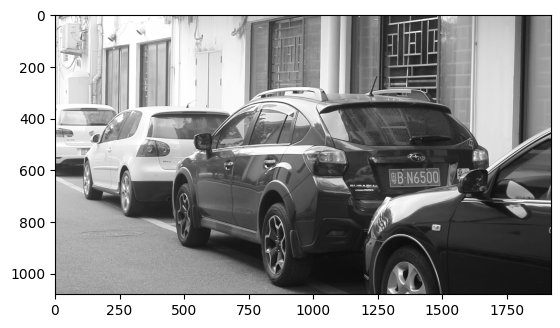

In [59]:
img=load_imagen('DPP0357.TIF')


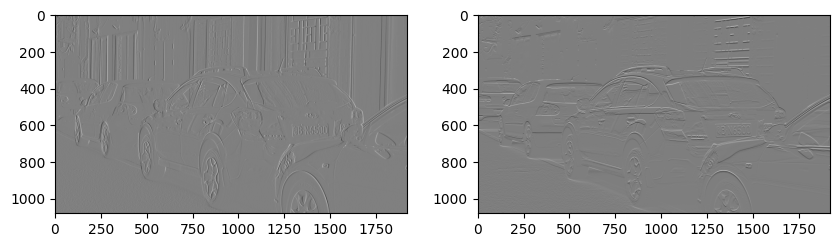

In [60]:
#Aplicar métodos sobel
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)
#Motrar imagen
figure, axes = plt.subplots(1, 2, figsize=(10, 10))
axes[0].imshow(sobelx, cmap='gray')
axes[1].imshow(sobely, cmap='gray')
plt.show()


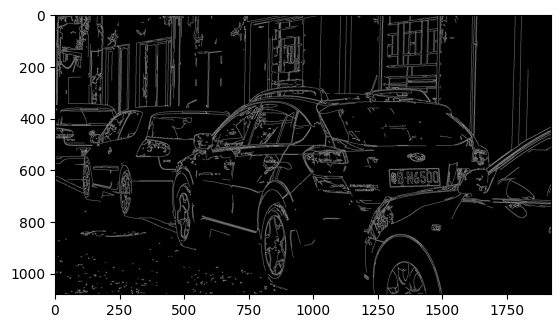

In [61]:
#Aplicar método canny
canny = cv2.Canny(img,100,200)
#Mostrar imagen
plt.imshow(canny, cmap='gray')

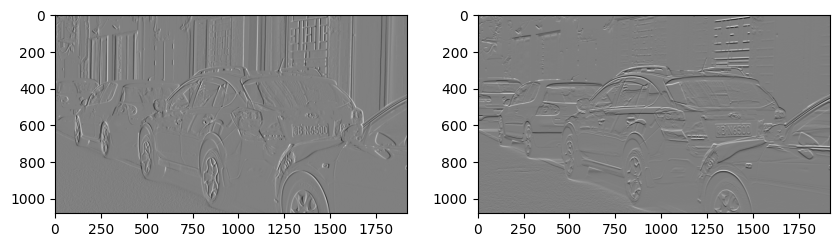

In [62]:
#Elige algún método de filtrado y aplícalo en la misma imagen. Repite los métodos de detección de contornos (inciso anterior) y analiza las diferencias con el resultado.

#Filtro blur
blur = cv2.blur(img,(5,5))

#Aplicar métodos sobel
sobelx = cv2.Sobel(blur,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(blur,cv2.CV_64F,0,1,ksize=5)
#Motrar imagen
figure, axes = plt.subplots(1, 2, figsize=(10, 10))
axes[0].imshow(sobelx, cmap='gray')
axes[1].imshow(sobely, cmap='gray')
plt.show()

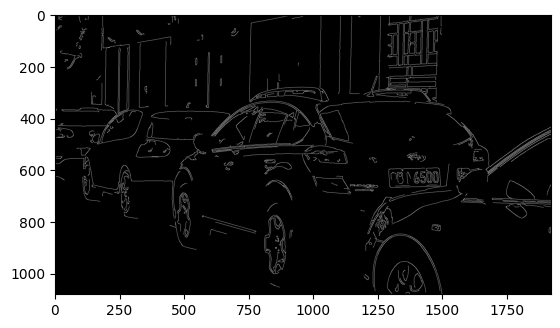

In [63]:
#Aplicar método canny
canny = cv2.Canny(blur,100,200)
#Mostrar imagen
plt.imshow(canny, cmap='gray')

In [64]:
#Realiza esto con diversas imágenes y parámetros de filtrado elegidos y analiza las diferencias en los resultados obtenidos. 

def imgfiltro(archivo,filtro, metodo):
    img=load_imagen(archivo)
    #Seleccionar filtro
    if filtro=='blur':
        img=cv2.blur(img,(5,5))
    elif filtro=='gaussian':
        img=cv2.GaussianBlur(img,(5,5),0)
    elif filtro=='median':
        img=cv2.medianBlur(img,5)

    else:
        print('Filtro no válido')

    #Seleccionar método
    if metodo=='sobel':
        sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
        sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)
        figure, axes = plt.subplots(1, 2, figsize=(10, 10))
        axes[0].imshow(sobelx, cmap='gray')
        axes[1].imshow(sobely, cmap='gray')
        plt.show()
    elif metodo=='canny':
        canny = cv2.Canny(img,100,200)
        plt.imshow(canny, cmap='gray')
    else:
        print('Método no válido')




In [65]:
#Lista de imágenes
imagenes=['DPP0022.TIF','DPP0027.TIF']

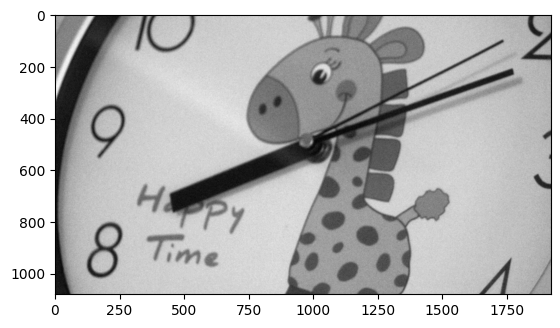

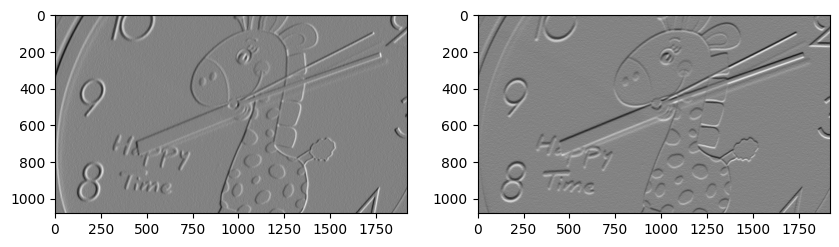

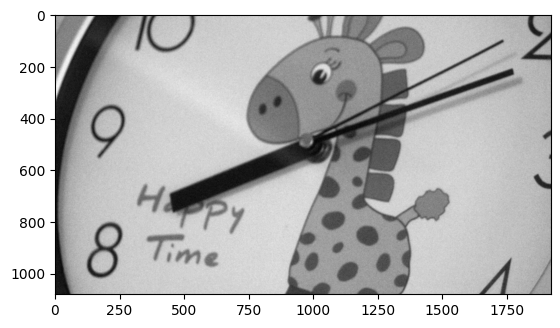

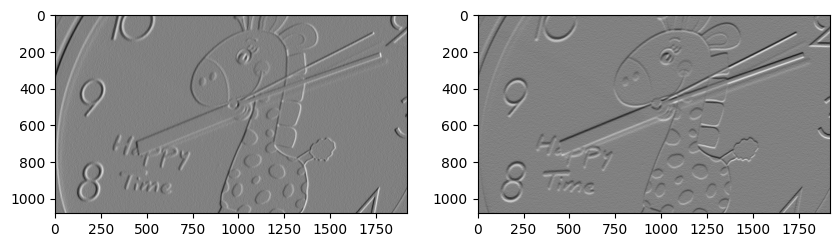

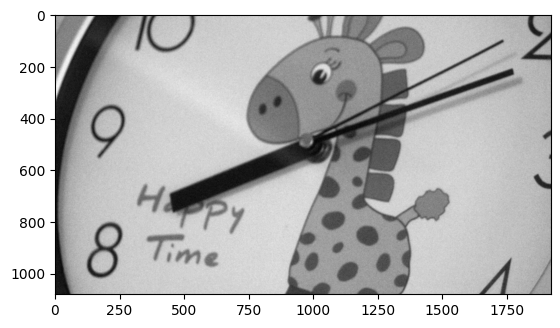

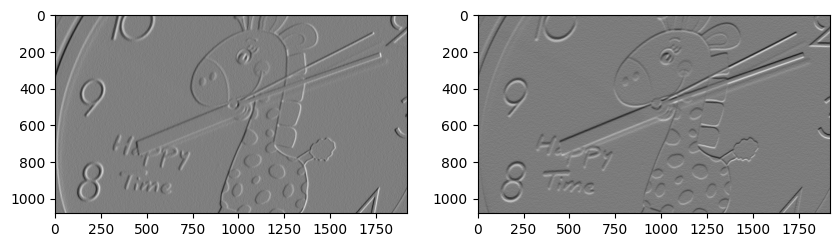

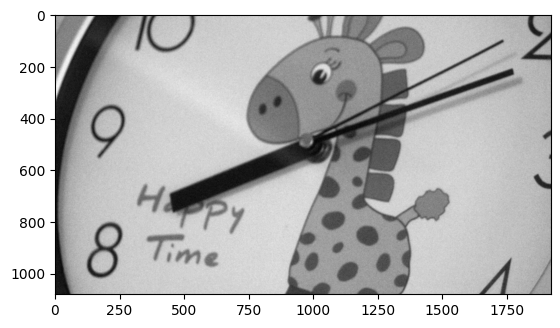

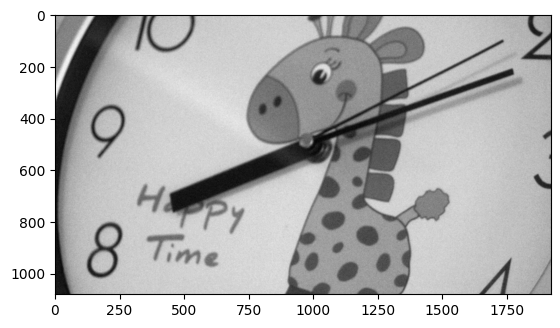

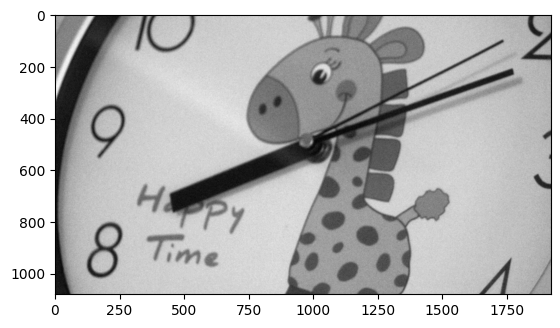

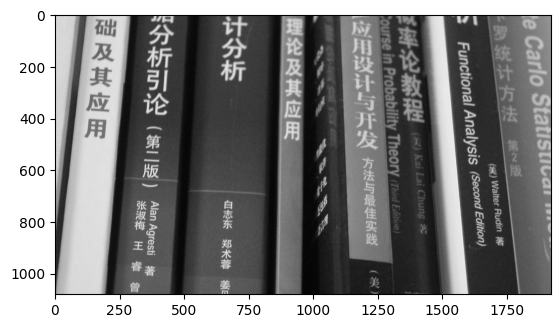

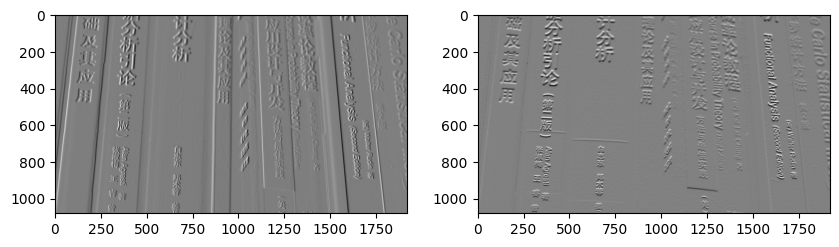

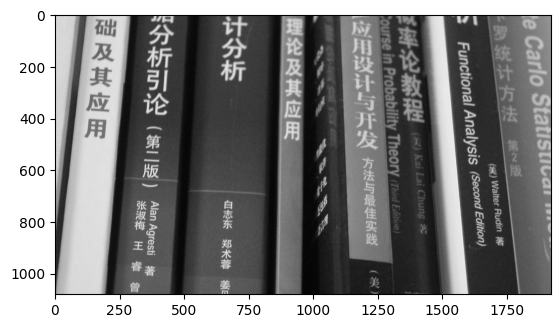

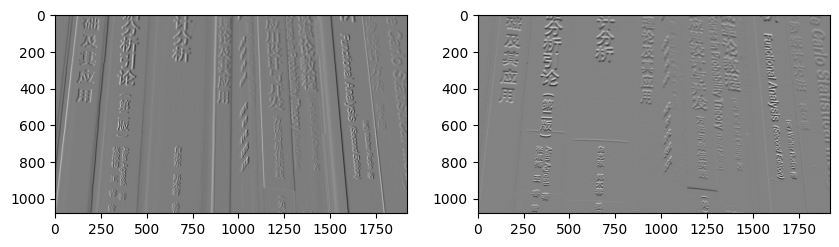

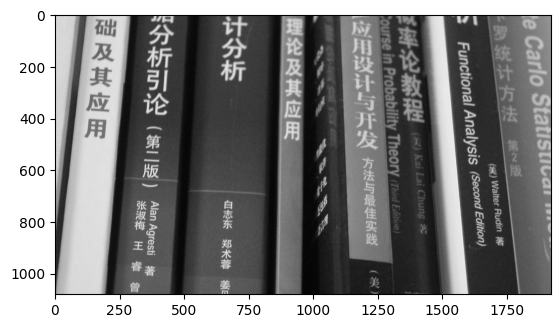

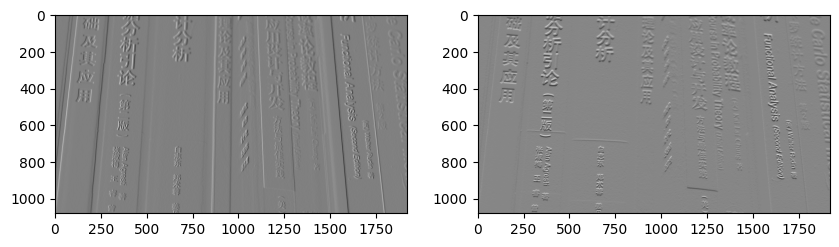

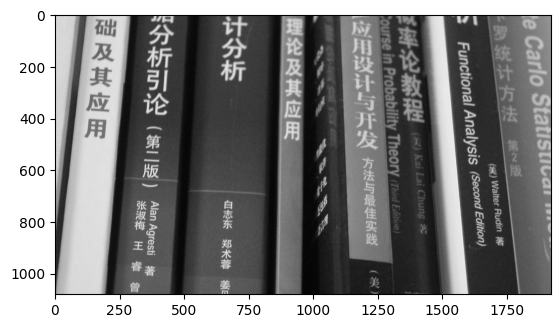

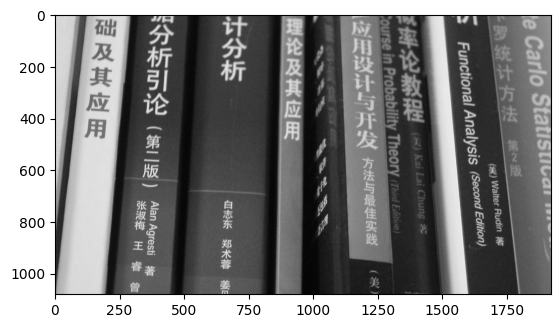

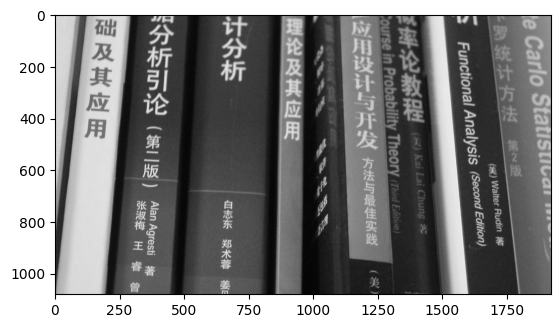

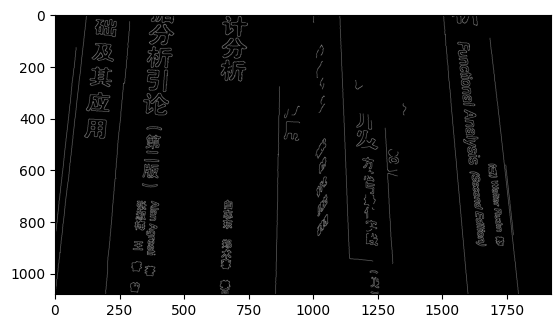

In [66]:
#Correr función
for elementos in imagenes:
    imgfiltro(elementos,'blur','sobel')
    imgfiltro(elementos,'gaussian','sobel')
    imgfiltro(elementos,'median','sobel')
    imgfiltro(elementos,'blur','canny')
    imgfiltro(elementos,'gaussian','canny')
    imgfiltro(elementos,'median','canny')

In [67]:
def process_image(img_name):
    
    # Paths
    path1 = 'G:/.shortcut-targets-by-id/1Ow6KjVPo1myLESTKlM8Q0m1s8bsDHkGo/TratamientoDigitalImagenes_2022_2/Imagenes/' + img_name
    path2 = 'C:/Users/claudio.pacheco/Documents/Repositorio/' + img_name
    
    # Primer path
    img = cv2.imread(path1)
    if img is None:
        img = cv2.imread(path2)

    # Checar si se cargó la imagen
    if img is None:
        print("No se pudo cargar la imagen")
        return

    # Convertir a RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Canales rojo, verde y azul
    rojo = img[:, :, 0]
    verde = img[:, :, 1]
    azul = img[:, :, 2]

    # Sobel
    sobelx = cv2.Sobel(rojo, cv2.CV_64F, 1, 0, ksize=5)
    sobely = cv2.Sobel(rojo, cv2.CV_64F, 0, 1, ksize=5)

    # Mostrar resultados
    figure, axes = plt.subplots(1, 2, figsize=(10, 10))
    axes[0].imshow(sobelx, cmap='gray')
    axes[1].imshow(sobely, cmap='gray')
    plt.show()

    # Canny
    cannyrojo = cv2.Canny(rojo, 100, 200)
    cannyverde = cv2.Canny(verde, 100, 200)
    cannyazul = cv2.Canny(azul, 100, 200)

    # Mostrar resultados
    figure, axes = plt.subplots(1, 3, figsize=(15, 15))
    axes[0].imshow(cannyrojo, cmap='gray')
    axes[1].imshow(cannyverde, cmap='gray')
    axes[2].imshow(cannyazul, cmap='gray')
    plt.show()

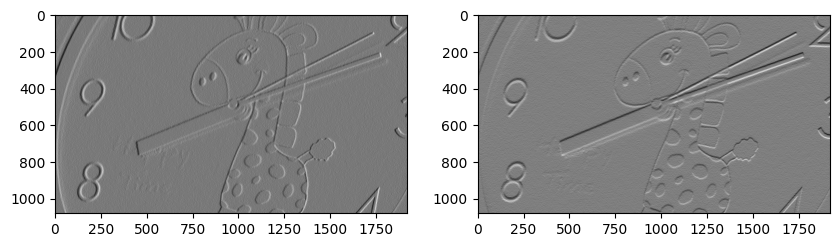

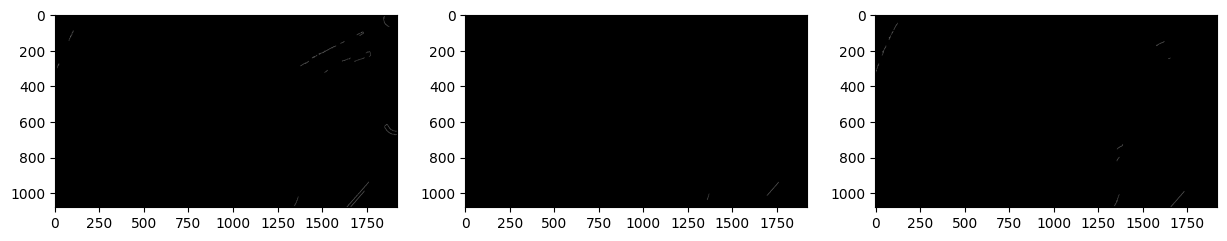

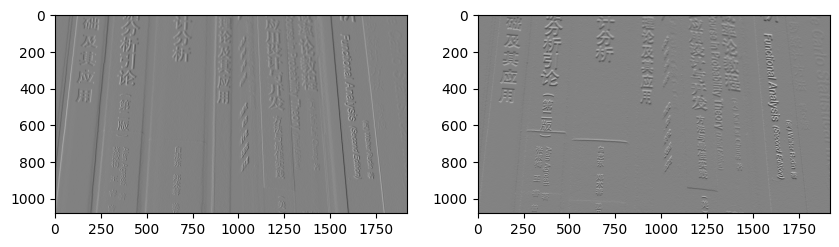

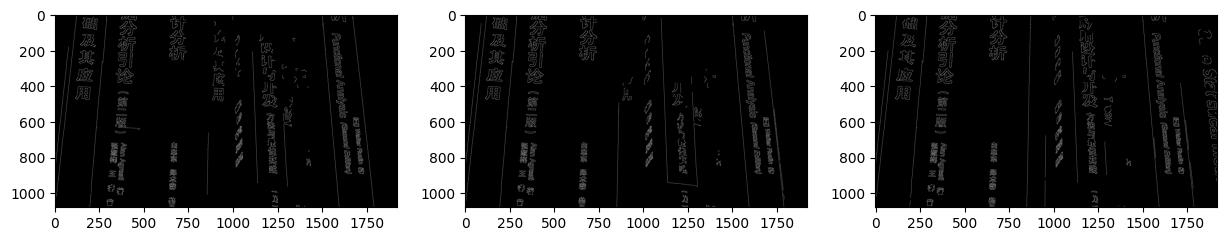

In [68]:
#Correr la función con las imágenes de la lista
for elementos in imagenes:
    process_image(elementos)